In [2]:
# Install CRAN packages if missing
packages <- c("dplyr", "ggplot2", "lme4", "emmeans","car","ARTool","rstatix","effectsize","effsize")

installed <- rownames(installed.packages())
for (p in packages) {
  if (!(p %in% installed)) {
    install.packages(p, dependencies = TRUE)
  }
}

# Load them after installation
lapply(packages, library, character.only = TRUE)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘effectsize’


The following objects are masked from ‘package:rstatix’:

    cohens_d, eta_squared




[[1]]
[1] "dplyr"     "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "ggplot2"   "dplyr"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "lme4"      "Matrix"    "ggplot2"   "dplyr"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "emmeans"   "lme4"      "Matrix"    "ggplot2"   "dplyr"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "car"       "carData"   "emmeans"   "lme4"      "Matrix"    "ggplot2"  
 [7] "dplyr"     "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[6]]
 [1] "ARTool"    "car"       "carData"   "emmeans"   "lme4"      "Matrix"   
 [7] "ggplot2"   "dplyr"     "stats"     "graphics"  "grDevices" "utils"    
[13] "datasets"  "methods"   "base"     

[[7]]
 [1] "rstatix"   "ARTool"    "car"       "carData"   "emmeans"   "lme4"     
 [7] "Matrix"    "ggplot2"   "dplyr"     "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     

[[8]]
 [1] "effectsize" "rstatix"    "ARTool"     "car"        "carData"   
 [6] "emmeans"    "lme4"       "Matrix"     "ggplot2"    "dplyr"     
[11] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[16] "methods"    "base"      

[[9]]
 [1] "effsize"    "effectsize" "rstatix"    "ARTool"     "car"       
 [6] "carData"    "emmeans"    "lme4"       "Matrix"     "ggplot2"   
[11] "dplyr"      "stats"      "graphics"   "grDevices"  "utils"     
[16] "datasets"   "methods"    "base"

## Data Import & Cleaning
We load the experimental run table (`run_table.csv`), inspect its structure, and remove missing values.  
We also check the number of runs per treatment combination to ensure balanced data.  
⚠️ In a later step, we must report failed runs (e.g., "X out of N failed due to Y") instead of silently removing them.


In [3]:
# Load the CSV
df <- read.csv("run_table.csv")

# Check structure
str(df)

# Basic cleaning: remove NAs
df <- na.omit(df)

# Summary of missing values
colSums(is.na(df))

# Check number of runs per treatment combination
df %>% count(gc_strategy, workload, jdk)

# Count failed runs before NA removal
failed_runs <- sum(is.na(df))
total_runs <- nrow(df) + failed_runs
cat("Failed runs:", failed_runs, "out of", total_runs, "\n")


'data.frame':	216 obs. of  12 variables:
 $ X__run_id     : chr  "run_0_repetition_0" "run_1_repetition_0" "run_2_repetition_0" "run_3_repetition_0" ...
 $ X__done       : chr  "DONE" "DONE" "DONE" "DONE" ...
 $ subject       : chr  "dacapo" "dacapo" "dacapo" "dacapo" ...
 $ gc_strategy   : chr  "SerialGC" "SerialGC" "SerialGC" "SerialGC" ...
 $ workload      : chr  "light" "light" "medium" "medium" ...
 $ jdk           : chr  "oraclejdk11" "openjdk17" "oraclejdk11" "openjdk17" ...
 $ energy_joules : num  3.58 2.57 7.66 8.98 9.51 ...
 $ execution_time: num  0.327 0.338 0.649 0.71 1.036 ...
 $ power_watts   : num  10.96 7.61 11.81 12.64 9.18 ...
 $ exit_code     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X.1           : chr  "/Users/rahilsharma/Desktop/Green-Lab/Mock-Server/gc_energy_experiment/experiments/gc_energy_experiment/run_0_repetition_0" "/Users/rahilsharma/Desktop/Green-Lab/Mock-Server/gc_energy_experiment/experiments/gc_energy_experimen

X__run_id        X__done        subject    gc_strategy       workload 
             0              0              0              0              0 
           jdk  energy_joules execution_time    power_watts      exit_code 
             0              0              0              0              0 
             X            X.1 
             0              0

gc_strategy,workload,jdk,n
<chr>,<chr>,<chr>,<int>
G1GC,heavy,openjdk17,12
G1GC,heavy,oraclejdk11,12
G1GC,light,openjdk17,12
G1GC,light,oraclejdk11,12
G1GC,medium,openjdk17,12
G1GC,medium,oraclejdk11,12
ParallelGC,heavy,openjdk17,12
ParallelGC,heavy,oraclejdk11,12
ParallelGC,light,openjdk17,12


Failed runs: 0 out of 216 


## Descriptive Statistics & Visualization
We compute the mean, standard deviation, and 95% confidence intervals for energy consumption across GC, workload, and JDK combinations.  
We also visualize distributions using boxplots and interaction plots to identify trends and possible outliers.


gc_strategy,workload,jdk,mean_energy,sd_energy,ci_low,ci_high
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
G1GC,heavy,openjdk17,15.370162,4.3996477,12.574760,18.165565
G1GC,heavy,oraclejdk11,11.477760,4.9121901,8.356703,14.598816
G1GC,light,openjdk17,4.190206,1.2493240,3.396423,4.983989
G1GC,light,oraclejdk11,3.982909,0.9971837,3.349328,4.616489
G1GC,medium,openjdk17,9.603073,3.0567949,7.660878,11.545268
G1GC,medium,oraclejdk11,8.954945,3.4731396,6.748217,11.161672
ParallelGC,heavy,openjdk17,14.674603,2.7285167,12.940986,16.408220
ParallelGC,heavy,oraclejdk11,13.853493,2.9230599,11.996269,15.710717
ParallelGC,light,openjdk17,4.096408,0.6394977,3.690090,4.502725


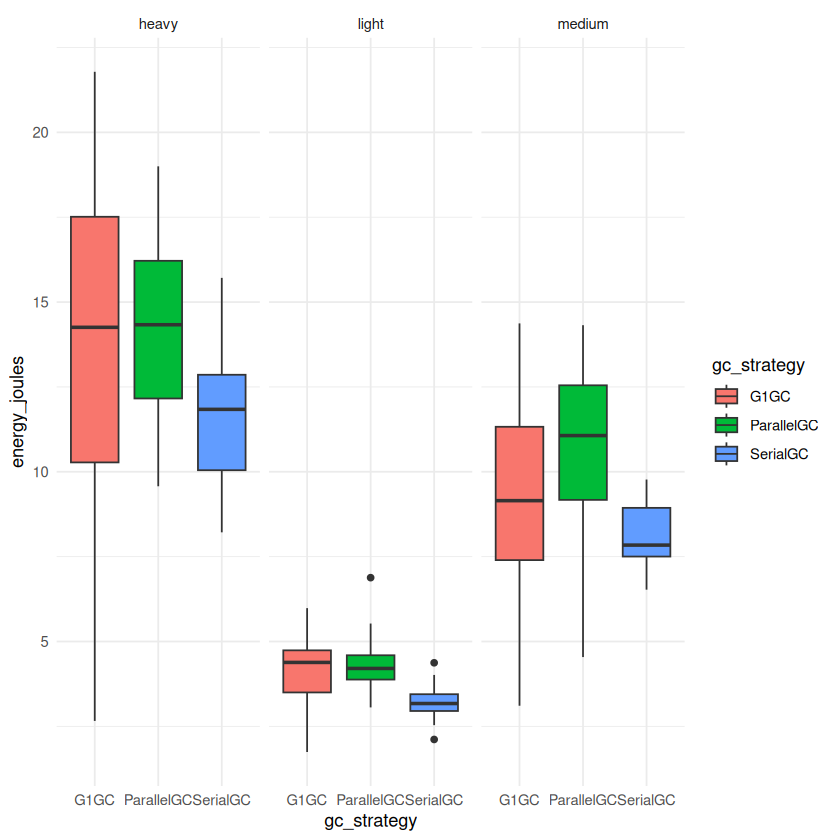

numeric(0)

X__run_id,X__done,subject,gc_strategy,workload,jdk,energy_joules,execution_time,power_watts,exit_code,X,X.1
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>


numeric(0)


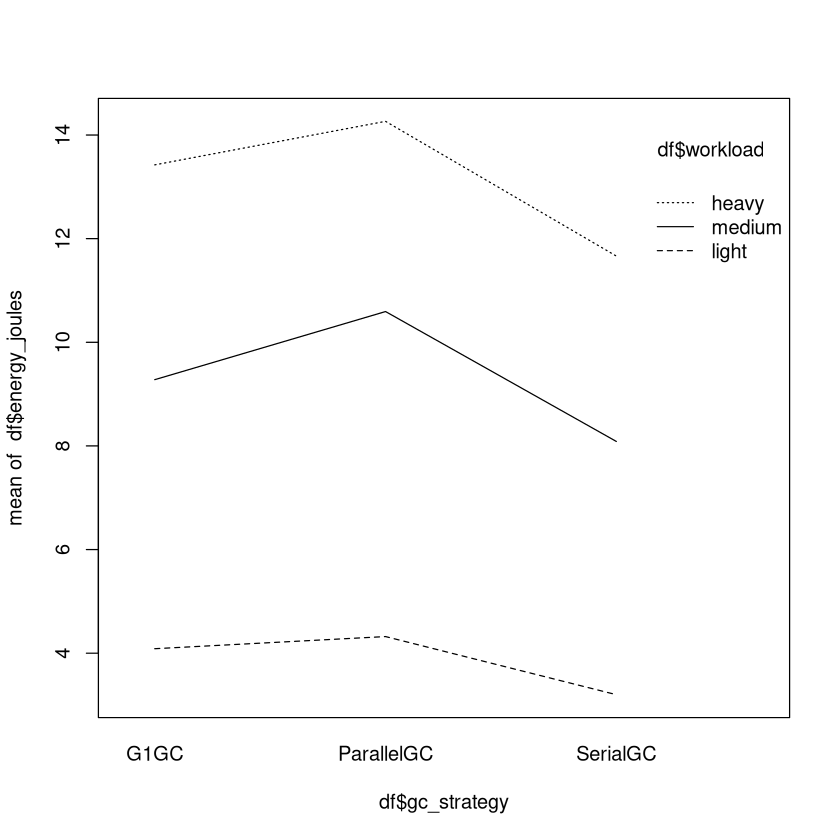

In [4]:
# Descriptive statistics
df %>%
  group_by(gc_strategy, workload, jdk) %>%
  summarise(
    mean_energy = mean(energy_joules),
    sd_energy   = sd(energy_joules),
    ci_low      = mean_energy - qt(0.975, n()-1) * sd_energy/sqrt(n()),
    ci_high     = mean_energy + qt(0.975, n()-1) * sd_energy/sqrt(n()),
    .groups = "drop"
  )

# Boxplots
ggplot(df, aes(x = gc_strategy, y = energy_joules, fill = gc_strategy)) +
  geom_boxplot() +
  facet_wrap(~workload) +
  theme_minimal()

# Interaction plot
interaction.plot(df$gc_strategy, df$workload, df$energy_joules)


# Identify outliers in energy consumption
outliers <- boxplot.stats(df$energy_joules)$out
outliers

# Inspect which runs are outliers
df %>% filter(energy_joules %in% outliers)

outliers <- boxplot.stats(df$energy_joules)$out
print(outliers)


Boxplots showed a few potential outliers, but none were flagged as extreme by boxplot.stats. Therefore, no runs were excluded

## Data Preparation
We ensure that categorical variables (GC strategy, workload, JDK, subject) are properly treated as factors for analysis.


In [5]:
df$gc_strategy <- factor(df$gc_strategy)
df$workload    <- factor(df$workload)
df$jdk         <- factor(df$jdk)
df$subject     <- factor(df$subject)

## Assumptions Testing
We check whether model residuals meet key ANOVA assumptions:
- **Normality** (Shapiro-Wilk test)  
- **Homogeneity of variance** (Levene’s test)  
- **Independence** (ensured by experimental design with randomization and cooldowns).  

If assumptions fail, we will attempt data transformations (log/sqrt) before switching to non-parametric methods.


In [6]:
# Fit linear model for residuals check
model <- lm(energy_joules ~ gc_strategy * workload * jdk, data=df)

# Normality test on residuals
shapiro.test(resid(model))

# Homogeneity of variance (Levene's test)
leveneTest(energy_joules ~ gc_strategy * workload * jdk, data=df)

# Independence: assumed from randomization protocol



	Shapiro-Wilk normality test

data:  resid(model)
W = 0.95548, p-value = 2.973e-06


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,17,6.619304,2.301149e-12
,198,NA,NA


Both tests showed significant violations (p < 0.001), indicating the ANOVA assumptions are not satisfied.  
Therefore, we attempted a log-transformation before considering non-parametric methods.


## Data Transformation Attempt (Log)
Since the Shapiro-Wilk and Levene’s tests showed that assumptions of normality and equal variance are violated, 
we attempt a simple log-transformation of the energy values.  

The results still indicated strong violations of normality (p < 1e-9) and homogeneity (p ≈ 0.006).  
Thus, transformation did not resolve assumption issues, and we proceed with ART (non-parametric factorial ANOVA).

In [7]:
# Apply log transformation to the dependent variable
df$log_energy <- log(df$energy_joules)

# Check assumptions again with transformed data
log_model <- lm(log_energy ~ gc_strategy * workload * jdk, data=df)

# Shapiro-Wilk test for normality on residuals
shapiro.test(resid(log_model))

# Levene’s test for homogeneity of variance
leveneTest(log_energy ~ gc_strategy * workload * jdk, data=df)



	Shapiro-Wilk normality test

data:  resid(log_model)
W = 0.91183, p-value = 5.084e-10


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,17,2.176071,0.005905881
,198,NA,NA


Log-transformation did not resolve assumption violations (normality and homogeneity still violated). Therefore, we proceed with non-parametric ART for hypothesis testing.

## Hypothesis Testing (Parametric, for comparison)
Although assumptions were not satisfied, we still ran a mixed-effects ANOVA to provide a comparison.  
Results showed workload as the dominant factor (F ≈ 265, p < 1e-50) and GC strategy also significant (F ≈ 13.5, p < 0.001).  
However, due to violated assumptions, these results should be interpreted with caution and are presented as supplementary.


In [8]:
# Mixed-effects ANOVA: subject as random effect
anova_model <- lmer(energy_joules ~ gc_strategy * workload * jdk + (1|subject), data=df)

anova(anova_model)

# Post-hoc Tukey HSD
emmeans(anova_model, pairwise ~ gc_strategy | workload)


# Example: adjust p-values from Tukey comparisons
tukey_results <- emmeans(anova_model, pairwise ~ gc_strategy | workload)
tukey_df <- as.data.frame(tukey_results$contrasts)

# Apply Benjamini-Hochberg correction
tukey_df$p.adjusted <- p.adjust(tukey_df$p.value, method = "BH")
tukey_df



,npar,Sum Sq,Mean Sq,F value
,<int>,<dbl>,<dbl>,<dbl>
gc_strategy,2,157.96009,78.980043,13.4734016
workload,2,3111.92855,1555.964274,265.4358085
jdk,1,10.87962,10.879618,1.8559811
gc_strategy:workload,4,18.80326,4.700816,0.8019239
gc_strategy:jdk,2,35.61363,17.806817,3.0377091
workload:jdk,2,16.57793,8.288965,1.4140351
gc_strategy:workload:jdk,4,43.64785,10.911962,1.8614987


NOTE: Results may be misleading due to involvement in interactions



$emmeans
workload = heavy:
 gc_strategy emmean   SE df lower.CL upper.CL
 G1GC         13.42 0.52 61    12.38    14.46
 ParallelGC   14.26 0.52 61    13.22    15.30
 SerialGC     11.66 0.52 61    10.62    12.70

workload = light:
 gc_strategy emmean   SE df lower.CL upper.CL
 G1GC          4.09 0.52 61     3.05     5.13
 ParallelGC    4.32 0.52 61     3.28     5.36
 SerialGC      3.20 0.52 61     2.16     4.24

workload = medium:
 gc_strategy emmean   SE df lower.CL upper.CL
 G1GC          9.28 0.52 61     8.24    10.32
 ParallelGC   10.59 0.52 61     9.55    11.63
 SerialGC      8.09 0.52 61     7.05     9.13

Results are averaged over the levels of: jdk 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
workload = heavy:
 contrast              estimate    SE  df t.ratio p.value
 G1GC - ParallelGC       -0.840 0.699 195  -1.202  0.4534
 G1GC - SerialGC          1.760 0.699 195   2.518  0.0336
 ParallelGC - SerialGC    2.600 0.699 195   3.720  0.0008

w

NOTE: Results may be misleading due to involvement in interactions



,contrast,workload,estimate,SE,df,t.ratio,p.value,p.adjusted
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,G1GC - ParallelGC,heavy,-0.8400869,0.6989232,195,-1.2019732,0.4534285406,0.510107108
2,G1GC - SerialGC,heavy,1.7598815,0.6989232,195,2.5179900,0.0335814422,0.100744327
3,ParallelGC - SerialGC,heavy,2.5999684,0.6989232,195,3.7199632,0.0007587079,0.005518166
4,G1GC - ParallelGC,light,-0.2342712,0.6989232,195,-0.3351888,0.9399692137,0.939969214
5,G1GC - SerialGC,light,0.8869035,0.6989232,195,1.2689571,0.4144409175,0.510107108
6,ParallelGC - SerialGC,light,1.1211747,0.6989232,195,1.6041459,0.2463069145,0.369460372
7,G1GC - ParallelGC,medium,-1.3142492,0.6989232,195,-1.8803916,0.1470940800,0.330961680
8,G1GC - SerialGC,medium,1.1926408,0.6989232,195,1.7063976,0.2053624344,0.369460372
9,ParallelGC - SerialGC,medium,2.5068900,0.6989232,195,3.5867891,0.0012262591,0.005518166


## Hypothesis Testing (Non-Parametric, ART)
Given that both raw and log-transformed data violated assumptions,  
we applied the Aligned Rank Transform (ART) for factorial ANOVA.  

Results confirmed:
- **GC strategy**: significant (F ≈ 24.3, p < 1e-9)  
- **Workload**: dominant effect (F ≈ 265, p < 1e-56)  
- **JDK**: not significant (p ≈ 0.09)  
- **GC × workload interaction**: borderline (p ≈ 0.058)  

We therefore base our main conclusions on these ART results.

In [9]:
art_model <- art(energy_joules ~ gc_strategy * workload * jdk + (1|subject), data=df)
anova(art_model)

,Term,F,Df,Df.res,Pr(>F)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
gc_strategy,gc_strategy,24.341860,2,195,3.654175e-10
workload,workload,265.174416,2,195,2.371648e-56
jdk,jdk,2.881885,1,195,9.117637e-02
gc_strategy:workload,gc_strategy:workload,2.327720,4,195,5.765203e-02
gc_strategy:jdk,gc_strategy:jdk,4.368306,2,195,1.393604e-02
workload:jdk,workload:jdk,1.715447,2,195,1.825865e-01
gc_strategy:workload:jdk,gc_strategy:workload:jdk,2.024419,4,195,9.251673e-02


## Effect Size
We compute Cohen’s d for pairwise comparisons of GC strategies.  
This complements p-values by quantifying the *practical significance* of differences (small ≈ 0.2, medium ≈ 0.5, large ≈ 0.8).  
⚠️ For non-parametric cases, Cliff’s delta should also be computed.


In [10]:
strategies <- unique(df$gc_strategy)

# Generate all pairwise Cohen's d
pairwise_d <- combn(strategies, 2, simplify = FALSE, FUN = function(groups) {
  d <- cohens_d(energy_joules ~ gc_strategy,
                data = df %>% filter(gc_strategy %in% groups))
  d$comparison <- paste(groups, collapse = " vs ")
  d
})

pairwise_d <- do.call(rbind, pairwise_d)
print(pairwise_d)

# Cliff's delta between groups (example GC1 vs GC2)
cliff.delta(energy_joules ~ gc_strategy, data = df)



Cohen's d |        95% CI |             comparison
--------------------------------------------------
0.49      | [ 0.16, 0.82] | SerialGC vs ParallelGC
0.28      | [-0.04, 0.61] |       SerialGC vs G1GC
-0.16     | [-0.49, 0.17] |     ParallelGC vs G1GC

- Estimated using pooled SD.


Cliff's Delta

delta estimate: -0.1107253 (negligible)
95 percent confidence interval:
      lower       upper 
-0.29427951  0.08070685 


## Energy–Performance Trade-offs
To answer RQ3, we analyze the trade-off between energy consumption and runtime.  
We plot Energy vs Execution Time for each GC strategy and identify Pareto-optimal configurations (minimizing both).


`geom_smooth()` using formula = 'y ~ x'


,X__run_id,X__done,subject,gc_strategy,workload,jdk,energy_joules,execution_time,power_watts,exit_code,X,X.1,log_energy
,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>
1,run_31_repetition_2,DONE,imageproc,G1GC,light,openjdk17,1.745320,0.354097,4.928929,0,176,/Users/rahilsharma/Desktop/Green-Lab/Mock-Server/gc_energy_experiment/experiments/gc_energy_experiment/run_31_repetition_2,0.5569379
2,run_66_repetition_1,DONE,todoapp,G1GC,light,oraclejdk11,1.998500,0.369390,5.410270,0,139,/Users/rahilsharma/Desktop/Green-Lab/Mock-Server/gc_energy_experiment/experiments/gc_energy_experiment/run_66_repetition_1,0.6923969
3,run_36_repetition_1,DONE,petclinic,SerialGC,light,oraclejdk11,2.113935,0.234892,8.999614,0,109,/Users/rahilsharma/Desktop/Green-Lab/Mock-Server/gc_energy_experiment/experiments/gc_energy_experiment/run_36_repetition_1,0.7485511
4,run_49_repetition_2,DONE,petclinic,G1GC,light,openjdk17,2.467123,0.233210,10.578995,0,194,/Users/rahilsharma/Desktop/Green-Lab/Mock-Server/gc_energy_experiment/experiments/gc_energy_experiment/run_49_repetition_2,0.9030527
5,run_18_repetition_1,DONE,imageproc,SerialGC,light,oraclejdk11,2.535410,0.362847,6.987544,0,91,/Users/rahilsharma/Desktop/Green-Lab/Mock-Server/gc_energy_experiment/experiments/gc_energy_experiment/run_18_repetition_1,0.9303554
6,run_1_repetition_0,DONE,dacapo,SerialGC,light,openjdk17,2.571252,0.338038,7.606401,0,2,/Users/rahilsharma/Desktop/Green-Lab/Mock-Server/gc_energy_experiment/experiments/gc_energy_experiment/run_1_repetition_0,0.9443929
7,run_1_repetition_2,DONE,dacapo,SerialGC,light,openjdk17,2.606328,0.288921,9.020915,0,146,/Users/rahilsharma/Desktop/Green-Lab/Mock-Server/gc_energy_experiment/experiments/gc_energy_experiment/run_1_repetition_2,0.9579423
8,run_70_repetition_1,DONE,todoapp,G1GC,heavy,oraclejdk11,2.660251,0.871725,3.051709,0,143,/Users/rahilsharma/Desktop/Green-Lab/Mock-Server/gc_energy_experiment/experiments/gc_energy_experiment/run_70_repetition_1,0.9784205
9,run_0_repetition_2,DONE,dacapo,SerialGC,light,oraclejdk11,2.674275,0.350631,7.627033,0,145,/Users/rahilsharma/Desktop/Green-Lab/Mock-Server/gc_energy_experiment/experiments/gc_energy_experiment/run_0_repetition_2,0.9836783


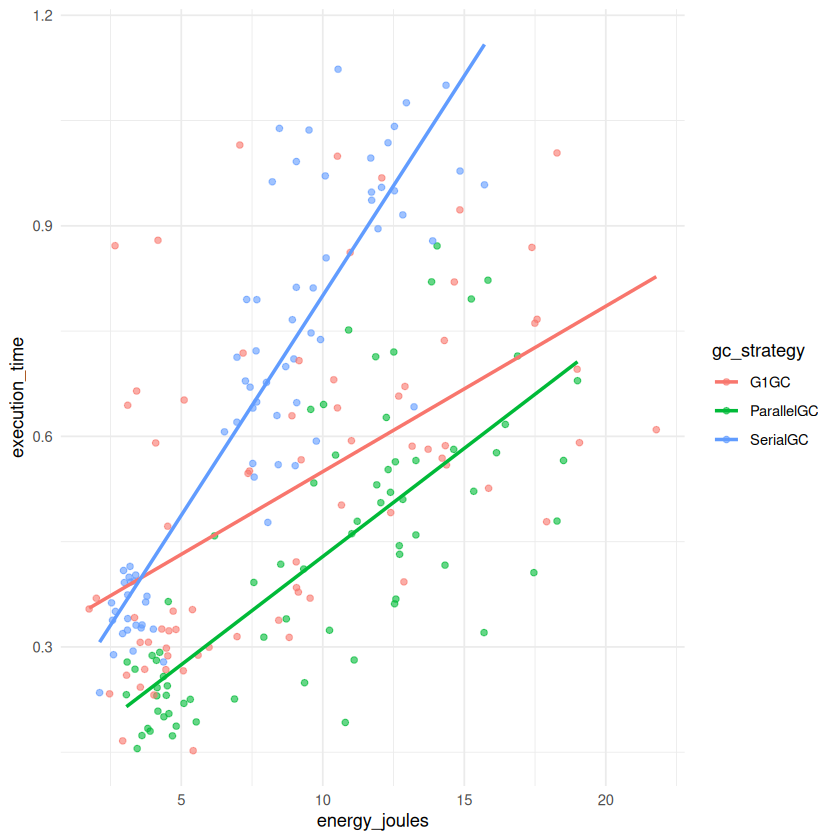

In [11]:
# Scatter plot energy vs runtime
ggplot(df, aes(x=energy_joules, y=execution_time, color=gc_strategy)) +
  geom_point(alpha=0.6) +
  geom_smooth(method="lm", se=FALSE) +
  theme_minimal()

# Identify Pareto front (minimize Energy & Runtime)
df %>%
  arrange(energy_joules, execution_time) %>%
  head(10)   # candidates for Pareto-optimal


## Interpretation & Reporting
- Assumption tests showed that normality and homogeneity were violated, both before and after log-transformation.  
- As a result, ART was applied, and those results are considered the most reliable.  
- The analysis shows workload as the strongest driver of energy use, GC as a secondary but significant factor, and JDK as negligible.  
- Practical significance is moderate: Cohen’s d ≈ 0.5 for SerialGC vs ParallelGC (medium effect).  
- Trade-off analysis highlights SerialGC and G1GC as Pareto-efficient, especially under light workloads.
